In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction


In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

In [376]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
os.chdir(r'F:\Project')
Data= pd.read_excel('Data.xlsx',sheetname="Sheet1")

C:\Users\Chien\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [175]:
Data1 = Data[["Date","Topic","English","Token","log_ret1"]]

In [176]:
import re
def junk_to_alpha(s):
  s = re.sub(r"\s*[^A-Za-z]+\s*", " ", s)
  return s

In [177]:
Data1['English']=Data1['English'].apply(junk_to_alpha)

C:\Users\Chien\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
Cluster= pd.read_excel('Cluster.xlsx',sheetname="Sheet1")

C:\Users\Chien\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [208]:
Join1=(Cluster.merge(Data1, 
           how="right", 
           right_on=["Topic","Date","log_ret1"], 
           left_on=["Topic","Date","log_ret1"]))
Join1=Join1.drop_duplicates(subset=['Topic', 'log_ret1'], keep='first')


In [380]:
stopwords2=['i',"'s",'is','us','bb','akw','really, the','also','one','second','today','years','want','first','years','zu','guttenberg', 'bundeswehr',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't","zu","1000",'clearly','lot','ofen','goes','gets',"every","noon","de"]

In [ ]:
##Option 1: all topics

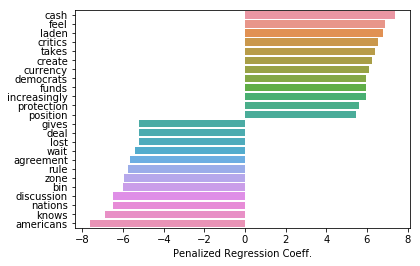

In [382]:
### Linear regression
from sklearn import datasets, linear_model

# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(Join1['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, Join1['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

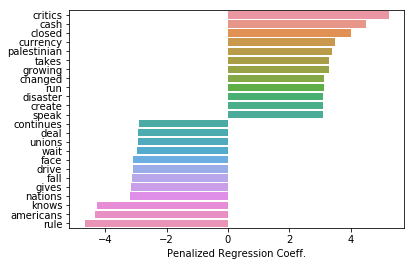

In [235]:
### Lasso regression

from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfVectorizer
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(Join1['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, Join1['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

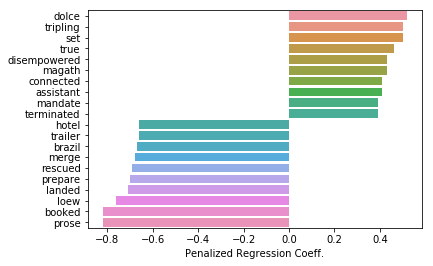

In [261]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(Join1['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, Join1['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
### Option 2 : All texts for one specific topic

In [324]:
Join1

,Cluster,Topic,log_ret1,Date,English,Token
0,A,Schuldenrückkauf Griechenland,0.400385,2012-12-03,critic greece buys a part his debt back to thi...,"['critic', 'greece', 'buys', 'a', 'part', 'his..."
1,A,Griechenland-Hilfe,0.061325,2012-11-30,here is the first german television with the d...,"['here', 'is', 'the', 'first', 'german', 'tele..."
2,A,Griechenland-Hilfe,-1.252960,2011-06-15,a special meeting of euro finance ministers we...,"['a', 'special', 'meeting', 'of', 'euro-financ..."
3,A,Abstimmung zu Griechenland,0.780638,2012-11-29,the government can join the bundestag with a b...,"['the', 'government', 'can', 'join', 'the', 'b..."
4,A,Griechenland,0.687573,2012-11-20,euro finance ministers take to the hour a new ...,"['euro-finance', 'ministers', 'take', 'to', 't..."
5,A,Deutsch-russische Gespräche,-1.327595,2012-11-16,chancellor merkel has russia as partner apprec...,"['chancellor', 'merkel', 'has', 'russia', 'as'..."
6,A,EU-Haushalt,-0.577098,2012-11-09,the negotiations on the budget of european uni...,"['the', 'negotiations', 'on', 'the', 'budget',..."
7,A,Merkel im EU-Parlament,-1.983964,2012-11-07,has consequences for the debt crisis chancello...,"['has', 'consequences', 'for', 'the', 'debt', ..."
8,A,Streik in Griechenland,0.697619,2012-11-06,in greece do again tens of thousands of people...,"['in', 'greece', 'do', 'again', 'tens', 'of', ..."
9,A,Streik in Griechenland,-0.508906,2012-11-05,in greece have strike again against the saving...,"['in', 'greece', 'have', 'strike', 'again', 'a..."


In [349]:
d = dict(tuple(Join1.groupby('Cluster')))

In [354]:
# Group A_ European debt crisis

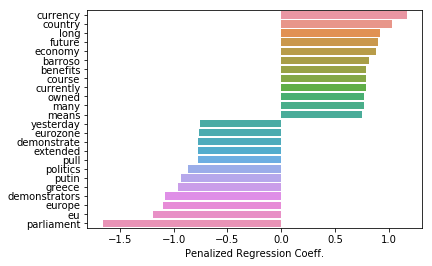

In [383]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['A']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['A']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


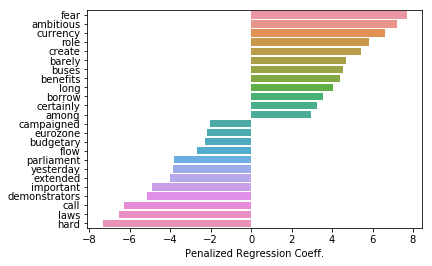

In [353]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['A']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['A']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

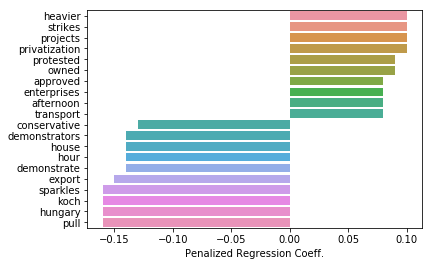

In [355]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['A']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['A']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupB_ War/Conflicts in the world

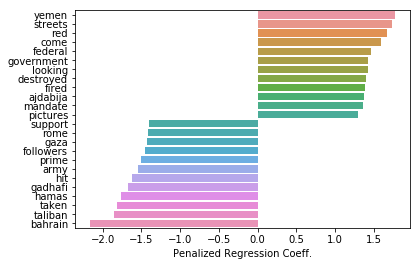

In [384]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['B']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['B']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

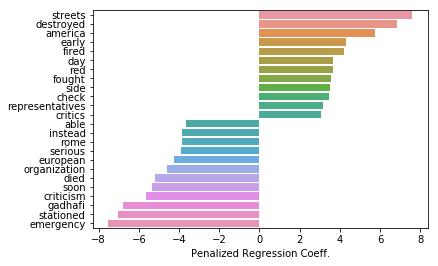

In [356]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['B']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['B']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

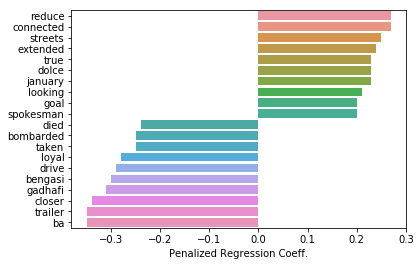

In [357]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['B']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['B']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#Group C_ Railway project

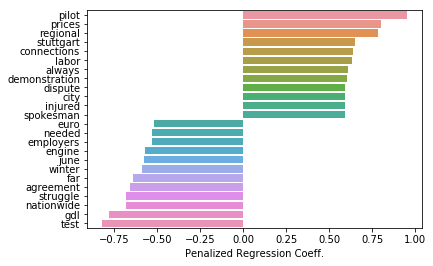

In [385]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['C']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['C']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


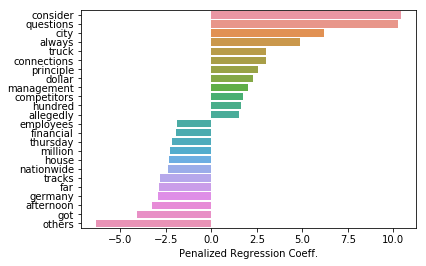

In [358]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['C']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['C']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

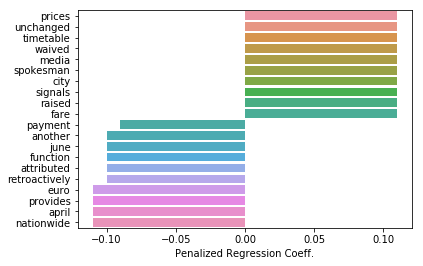

In [359]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['C']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['C']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupD_ Nuclear power issue


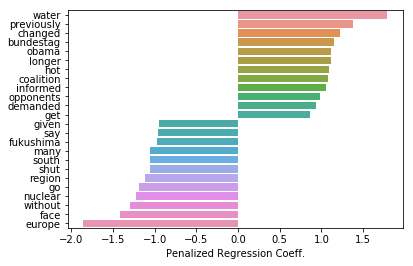

In [386]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['D']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['D']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


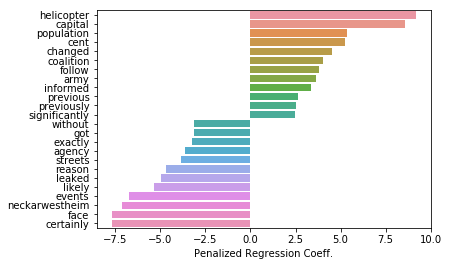

In [360]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['D']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['D']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

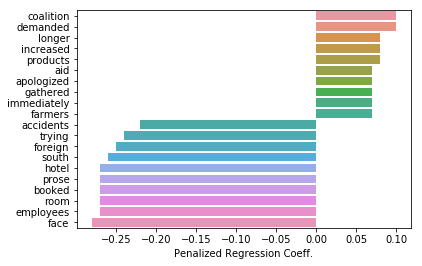

In [361]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['D']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['D']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupE_World situation


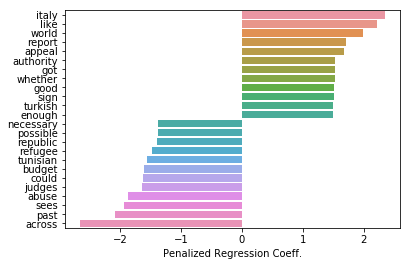

In [387]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['E']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['E']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


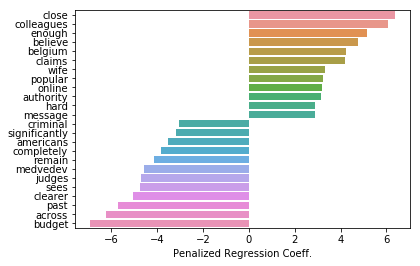

In [396]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['E']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.00001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['E']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

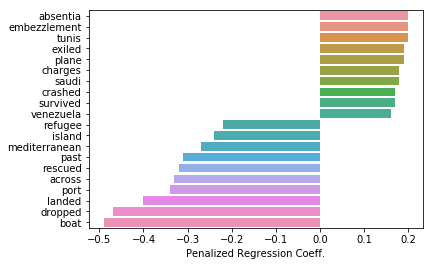

In [393]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['E']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['E']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupF_German situation


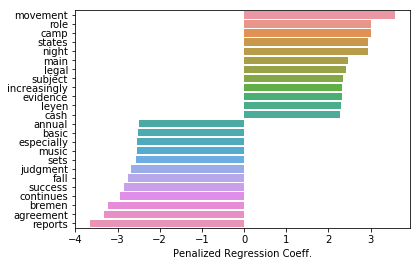

In [388]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['F']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['F']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

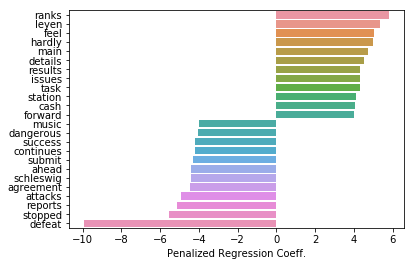

In [364]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['F']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['F']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

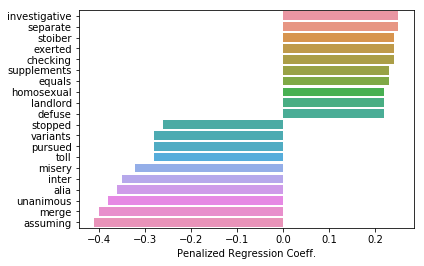

In [365]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['F']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['F']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupG_Sport


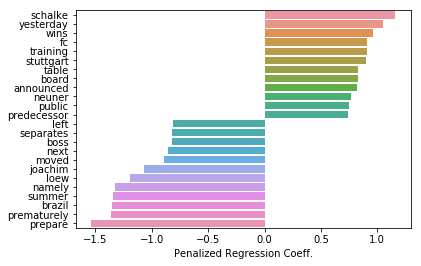

In [389]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['G']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['G']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


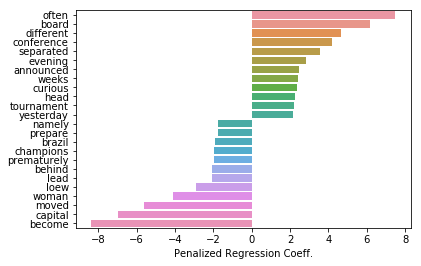

In [366]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['G']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['G']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

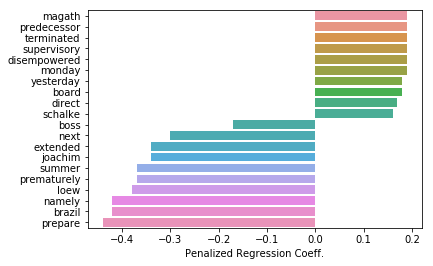

In [367]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['G']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['G']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()


In [ ]:
#GroupH_Natural disasters

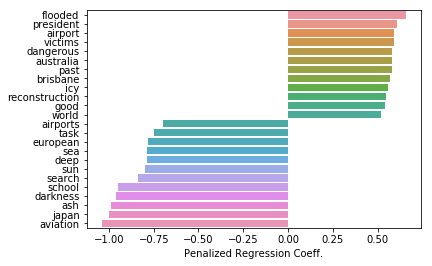

In [390]:
### Linear regression
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['H']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Linear coefficients
def linearRegression(X, Y):
    linear = linear_model.LinearRegression()
    linear.fit(X, Y)
    return linear.coef_

model_linear = linearRegression(grams, d['H']['log_ret1'])

# Sort coefficients
linear_coef = pd.DataFrame(np.round_(model_linear, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
linear_coef = linear_coef[linear_coef['penalized_regression_coefficients'] != 0]
linear_coef = linear_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
linear_coef = pd.concat([linear_coef.head(12),linear_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= linear_coef.index , data=linear_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


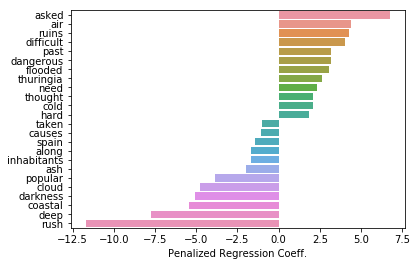

In [391]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['H']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['H']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

C:\Users\Chien\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


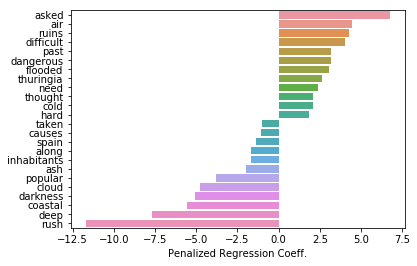

In [368]:
#Lasso
# Make ngrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['H']['English'])
# Show features (words)
vectorizer.get_feature_names()

# Show Lasso coefficients
def lassoRegression(X, Y):
    lasso = Lasso(alpha = 0.0001, fit_intercept=True, normalize=True, max_iter=1000)
    lasso.fit(X, Y)
    return lasso.coef_

model_lasso = lassoRegression(grams, d['H']['log_ret1'])

# Sort coefficients
lasso_coef = pd.DataFrame(np.round_(model_lasso, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
lasso_coef

# Top/Low 10 values
lasso_coef = pd.concat([lasso_coef.head(12),lasso_coef.tail(12)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , data=lasso_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()

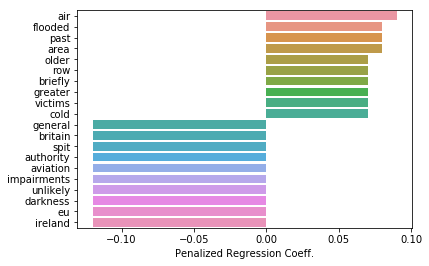

In [369]:
#Ridge regression
from sklearn.linear_model import Ridge
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords2,ngram_range=(1, 1))
grams = vectorizer.fit_transform(d['H']['English'])
def RidgeRegression(X, Y):
    ridge = Ridge(alpha = 0.1, fit_intercept=True, normalize=True, max_iter=1000)
    ridge.fit(X, Y)
    return ridge.coef_

model_ridge = RidgeRegression(grams, d['H']['log_ret1'])
# Sort coefficients
ridge_coef = pd.DataFrame(np.round_(model_ridge, decimals=2), vectorizer.get_feature_names(), columns = ["penalized_regression_coefficients"])
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending = False)
ridge_coef

# Top/Low 10 values
ridge_coef = pd.concat([ridge_coef.head(10),ridge_coef.tail(10)], axis=0)

# Plot
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , data=ridge_coef)
ax.set(xlabel='Penalized Regression Coeff.')
plt.show()
